<a href="https://colab.research.google.com/github/balamurugan-palaniappan-CEP/AIML_CEP_2021/blob/main/AIML_CEP_LA_TA_Session_Oct09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data set Exploration

In [ ]:
import numpy as np #numpy package will be useful for most of the array operations in the code 
from sklearn.datasets import load_breast_cancer

In [ ]:
#Let us load the breast cancer data and store the result in X_y variable. The idea behind naming of the variable will be illustrated in the next few tabs.
X_y = load_breast_cancer()

In [ ]:
#Let us print the contents of the X_y variable 

print(type(X_y))
print(X_y)

<class 'sklearn.utils.Bunch'>
{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0

In [ ]:
#So we found that the X_y variable is of type sklearn.utils.bunch
#further, we see that the X_y variable consists of dictionary-type structures named "data",  "target" and "target_names"

# Let us now segregate the data attributes and class labels into separate variables 

X = X_y.data
y = X_y.target

print('X shape:', X.shape, 'type(X):', type(X) )
print(' y shape:', y.shape, ' type(y):', type(y))

X shape: (569, 30) type(X): <class 'numpy.ndarray'>
 y shape: (569,)  type(y): <class 'numpy.ndarray'>


In [ ]:
#Thus we see that X and y are numpy ndarrays. 
#We also see that there are 569 samples (or instances) in the data set and each sample has 30 attributes. 
#The shape of target variable y indicates that y contains the labels for these 569 samples

#We can print the unique labels available in y 
print(np.unique(y))

[0 1]


In [ ]:
# Let us also segregate the data set description into a different variable and check the contents
X_y_description = X_y.DESCR
print('type(X_y_description):', type(X_y_description))
print(X_y_description)

type(X_y_description): <class 'str'>
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  Fo

In [ ]:
#Let us focus our discussion on the feature matrix X and keep aside the label matrix y for the time being.

#Let us compute two new matrices from X. 

XXT = np.matmul(X,np.transpose(X)) #X X^T matrix 
XTX = np.matmul(X.T,X) #X^T X matrix 

print('XXT shape:', XXT.shape, 'XTX shape:', XTX.shape)


XXT shape: (569, 569) XTX shape: (30, 30)


$XX^⊤$  and $X^⊤X$  are called covariance matrices.

In particular, $XX^⊤$ is of shape num samples×num samples and captures the correlation (upto scaling) between distinct samples in the data set. Hence we call $XX^⊤$ to be sample covariance matrix.

Similarly, $X^⊤X$  is of shape num features×num features and captures the correlation (upto scaling) between different attributes in the data set. Hence we call $X^⊤X$  to be feature covariance matrix.

In fact, these covariance matrices satisfy several important properties:

$XX^⊤$ and $X^⊤X$ are square and symmetric
$XX^⊤$ and $X^⊤X$ are positive semi-definite (that is, their eigen values are non-negative)
$XX^⊤$ and $X^⊤X$  have same positive eigen values.
$XX^⊤$ and $X^⊤X$  have the same rank as $X$.

Let us quickly check each of these facts.

In [ ]:
#checking if XXT and XTX are square and symmetric

print('XXT matrix:')
if XXT.shape[0] == XXT.shape[1]:
  print('XXT is square')
else:
  print('XXT is not square')

if np.all(XXT == XXT.T):
  print('XXT is symmetric')
else:
  print('XXT is not symmetric')


print('XTX matrix:')
if XTX.shape[0] == XTX.shape[1]:
  print('XTX is square')
else:
  print('XTX is not square')

if np.all(XTX == XTX.T):
  print('XTX is symmetric')
else:
  print('XTX is not symmetric')



XXT matrix:
XXT is square
XXT is symmetric
XTX matrix:
XTX is square
XTX is symmetric


In [ ]:
#checking if XXT and XTX are positive semi-definite
#First we will use linalg.eig in numpy, which can be used to find eigen values and eigen vectors for any square matrix

print('eigen values of XXT:')
eig_val_XXT, eig_vec_XXT = np.linalg.eig(XXT)
print (eig_val_XXT)
print('eigen values of XTX:')
eig_val_XTX, eig_vec_XTX = np.linalg.eig(XTX)
print(eig_val_XTX)


eigen values of XXT:
[ 9.47805173e+08+0.00000000e+00j  6.15261128e+06+0.00000000e+00j
  7.75214997e+05+0.00000000e+00j  3.08161865e+05+0.00000000e+00j
  2.34525303e+04+0.00000000e+00j  3.28217652e+03+0.00000000e+00j
  1.04033653e+03+0.00000000e+00j  2.11680737e+02+0.00000000e+00j
  9.66828410e+01+0.00000000e+00j  4.99857648e+01+0.00000000e+00j
  1.95840388e+01+0.00000000e+00j  4.86495390e+00+0.00000000e+00j
  1.98576241e+00+0.00000000e+00j  1.36712551e+00+0.00000000e+00j
  7.53587604e-01+0.00000000e+00j  3.82712943e-01+0.00000000e+00j
  2.25398781e-01+0.00000000e+00j  2.12921326e-01+0.00000000e+00j
  1.07597950e-01+0.00000000e+00j  9.45577167e-02+0.00000000e+00j
  4.44067163e-02+0.00000000e+00j  4.06949132e-02+0.00000000e+00j
  1.98503972e-02+0.00000000e+00j  1.61613742e-02+0.00000000e+00j
  9.72208362e-03+0.00000000e+00j  7.09962473e-03+0.00000000e+00j
  3.18901806e-03+0.00000000e+00j  1.97695613e-03+0.00000000e+00j
  1.13882417e-03+0.00000000e+00j  4.29587536e-04+0.00000000e+00j
  4.

## Important note about the results obtained from $\texttt{np.linalg.eig}$## 

Note that the results from $\texttt{np.linalg.eig}$ show complex eigen values for $XX^\top$ matrix. 

However from theory if $A$ is a real symmetric matrix, then the eigen values need to be real. We present a proof of the result below. 

So, the results from $\texttt{np.linalg.eig}$ are due to numerical errors due to floating point approximations and truncations involved in the algorithms used to compute the eigen values and eigen vectors. 

$\textbf{Result:}$ If $A$ is a real symmetric matrix, then the eigen values are real. 

A simple proof is as below: 

Let $\lambda$ be a complex number of the form $a+bi$ which is an eigen value for a real symmetric matrix $A$ corresponding to the eigen vector $x\neq \mathbf{0}$. Recall that the complex conjugate $\bar{\lambda}$ of $\lambda$ is given by $a-bi$. 

Then we have:

$
\begin{align}
Ax &= \lambda x \nonumber \\
\text{Taking complex conjugates } & \text { on both sides, we have} \nonumber \\
\overline{Ax} &= \overline{\lambda x} \nonumber \\
\bar{A} \bar{x} &= \bar{\lambda} \bar{x} \nonumber \\
\end{align}
$

However $\bar{A} = A$ since $A$ is real. Thus we have $A\bar{x} = \bar{\lambda} \bar{x}$. Hence $\bar{x} \neq \mathbf{0}$ is an eigen vector of $A$ with a corresponding eigen value $\bar{\lambda}$.   

Now consider $A \bar{x} = \lambda \bar{x}$. Pre-multiplying by $x^\top$ we have:

$
\begin{align}
x^\top A \bar{x} &= \lambda x^\top \bar{x} \nonumber \\
(Ax)^\top \bar{x} &= \lambda x^\top \bar{x} \nonumber \\
\implies (\lambda x)^\top \bar{x} &= \lambda x^\top \bar{x} \nonumber \\
\lambda x^\top \bar{x} &= \lambda x^\top \bar{x} \nonumber \\
\end{align}
$

Since $r=x^\top \bar{x} \neq 0$ is a real quantity $\textbf{(check this!)}$ we have:   $\lambda r=\bar{\lambda} r \implies \lambda =\bar{\lambda}$. 

Now $\lambda = \bar{\lambda} \implies a+bi = a-bi$ is possible if and only if $b=0$ or $\lambda$ is a real number. Hence the proof follows. 

In [ ]:
#checking if XXT and XTX are positive semi-definite
#we will use linalg.eigh in numpy, which can be useful for symmetric matrices 

print('eigen values of XXT:')
eig_val_XXT, eig_vec_XXT = np.linalg.eigh(XXT)
print(eig_val_XXT)

print('eigen values of XTX:')
eig_val_XTX, eig_vec_XTX = np.linalg.eigh(XTX)
print(eig_val_XTX)


eigen values of XXT:
[-2.80875776e-07 -1.94895194e-07 -1.80298192e-07 -6.85741301e-08
 -6.68056033e-08 -6.00138851e-08 -5.53517655e-08 -5.40929694e-08
 -4.76690410e-08 -4.41981869e-08 -4.09484601e-08 -4.05289263e-08
 -3.90250834e-08 -3.56952042e-08 -3.55557716e-08 -3.51706792e-08
 -3.44350158e-08 -3.27119243e-08 -3.17977693e-08 -3.15123846e-08
 -3.06489079e-08 -3.01044583e-08 -2.78574089e-08 -2.67563130e-08
 -2.56202802e-08 -2.52601310e-08 -2.44067154e-08 -2.37222631e-08
 -2.34154648e-08 -2.26253370e-08 -2.21707367e-08 -2.14707550e-08
 -2.13720815e-08 -2.11946880e-08 -2.01741227e-08 -1.92781360e-08
 -1.91901187e-08 -1.88353047e-08 -1.77197129e-08 -1.74463885e-08
 -1.70090907e-08 -1.69938689e-08 -1.67329896e-08 -1.64386241e-08
 -1.62944036e-08 -1.58755505e-08 -1.57992664e-08 -1.56054212e-08
 -1.51120484e-08 -1.46307620e-08 -1.42868709e-08 -1.36531287e-08
 -1.34089135e-08 -1.32642062e-08 -1.29388831e-08 -1.27691067e-08
 -1.23350700e-08 -1.22098467e-08 -1.21701441e-08 -1.20991457e-08
 -1.

## Important note about the results obtained from $\texttt{np.linalg.eigh}$## 

Note that the results from $\texttt{np.linalg.eigh}$ show some negative eigen values for $XX^\top$ matrix. 

However from theory, we know that if $A$ is a $n \times n$ symmetric and positive semi-definite matrix, then  the eigen values are non-negative. 

A proof of this result is given below. 

Hence the results from $\texttt{np.linalg.eigh}$ should be interpreted carefully. The negative values are again due to numerical errors in algorithms. 

$\mathbf{Result:}$ If $A$ is a $n \times n$ symmetric and positive semi-definite matrix, then  the eigen values are non-negative. 


$\textbf{Recall:}$ Since $A$ is symmetric and positive semi-definite, we know that $x^\top Ax\geq 0$ for any $x \in {\mathbb{R}}^n$. 

Now consider $v \neq \mathbf{0}$ as an eigen vector of $A$ with eigen value $\lambda$, we have: $Av = \lambda v$. 

Then we have by pre-multiplying by $v^\top$:

$
\begin{align}
v^\top Av &= v^\top (\lambda v) \nonumber \\
\implies \lambda v^\top  v &\geq 0 \nonumber 
\end{align}
$

Since we know that for a vector $v=\begin{bmatrix}
v_1 \\
v_2 \\
\vdots \\
v_n
\end{bmatrix} \in {\mathbb{R}}^n$, we have $v^\top v = \|v\|_2^2 = \sum_{i=1}^{n} v_i^2 \geq 0$ . 

Since $v \neq \mathbf{0}$, we have $\|v\|_2^2 > 0$. 

Thus  from $\lambda v^\top  v \geq 0$ and $v^\top v > 0$, we have $\lambda  \geq 0$. 

In [ ]:
#checking if XXT and XTX are have same positive eigen values 
#we will use linalg.eigh in numpy, which can be useful for symmetric matrices 

print('positive eigen values of XXT:')
eig_val_XXT,_ = np.linalg.eigh(XXT)
print( eig_val_XXT[np.where(eig_val_XXT > 0)])


print('positive eigen values of XXT:')
eig_val_XTX,_ = np.linalg.eigh(XTX)
print( eig_val_XTX[np.where(eig_val_XTX > 0)])


positive eigen values of XXT:
[1.51111036e-11 3.59411529e-11 4.60695331e-11 5.24439701e-11
 7.65673633e-11 1.02777402e-10 1.16433370e-10 1.49968739e-10
 1.81420587e-10 2.03653596e-10 2.08081873e-10 2.63286509e-10
 2.88207165e-10 2.99506974e-10 3.50196094e-10 3.70339138e-10
 3.89597351e-10 3.95319217e-10 4.00313619e-10 4.11271591e-10
 4.26474801e-10 4.44519605e-10 5.07124541e-10 5.26084848e-10
 5.44577085e-10 5.72649241e-10 5.97471851e-10 6.10772662e-10
 6.65906269e-10 6.68866912e-10 6.70217795e-10 6.83033404e-10
 7.36731244e-10 7.48475968e-10 7.60034388e-10 7.69611964e-10
 7.91565198e-10 8.24864346e-10 8.57057488e-10 8.78457670e-10
 9.00061383e-10 9.06113952e-10 9.55674112e-10 9.84100807e-10
 1.02873555e-09 1.04745050e-09 1.08975124e-09 1.09526713e-09
 1.11310878e-09 1.14974440e-09 1.15526126e-09 1.24295573e-09
 1.27067911e-09 1.28296099e-09 1.29205635e-09 1.30993544e-09
 1.34019151e-09 1.34668379e-09 1.38421557e-09 1.39277819e-09
 1.43096438e-09 1.47866443e-09 1.48209490e-09 1.4857205

##Note about the precision of eigen values:## 

Please note that there are a few positive eigen values which are close to zero. However in this case, we can guarantee that these values should be zero. 

These issues highlight some numerical issues when computing eigen values and eigen vectors using $\texttt{numpy.linalg.eig}$ and $\texttt{numpy.linalg.eigh}$. 

In [ ]:
#check rank of matrices XXT and XTX 

print('rank(XXT):', np.linalg.matrix_rank(XXT), 'rank(XTX):', np.linalg.matrix_rank(XTX))

rank(XXT): 30 rank(XTX): 30


## Rank of matrix $A$ :## 

Note that for a matrix $A$ of size $m \times n$, $rank(A)$ is defined as the number of linearly independent rows or columns in $A$. 

$rank(A)$= Number of non-zero eigen values of $A$.

Hence $rank(A) \leq \min\{m,n\}$. 

If $rank(A) = \min\{m,n\}$ then the matrix is called full rank. 

Note that for $\textit{breast cancer}$ data set, we have $X^\top X$ to be of size $30 \times 30$. Also note that $rank(X^\top X)=30$, hence $X^\top X$ is full-rank. 

## Checking alignment of sample features using dot products ## 

In [ ]:
#Take some samples of the same class 

X_class0 = X[np.where(y==0),:].squeeze()
print(X_class0.shape)

X_class1 = X[np.where(y==1),:].squeeze()
print(X_class1.shape)

(212, 30)
(357, 30)


In [ ]:
#Let us find the dot product between some samples of class 0
print(np.dot(X_class0[0]/np.linalg.norm(X_class0[0]),X_class0[1]/np.linalg.norm(X_class0[1])) )

0.9901630291785707


In [ ]:
#Let us find the dot product between some samples of class 1
print(np.dot(X_class1[30]/np.linalg.norm(X_class1[30]),X_class1[42]/np.linalg.norm(X_class1[42])) )

0.9938802981522772


In [ ]:
#Let us find the dot product between some samples of class 0 and class 1
print(np.dot(X_class0[0]/np.linalg.norm(X_class0[0]),X_class1[10]/np.linalg.norm(X_class1[10])) )

0.9728237531661882


# Linear/nonlinear trends between input and output values

We will now visualize the linear positive/negative relationship, nonlinear relationship among input variables and the associated output.
These concepts will help us in the better understanding of linear regression and classification models in the upcoming lectures.

In [ ]:
## Generate random input values
x_axis = np.linspace(-5,5,15) ## It generates 15 evenly spaced random values lie between -5 and +5
print ('Properties of x_axis:')
print ('Type =',type(x_axis))
print ('values:', x_axis)
print ('shape:',x_axis.shape)

Properties of x_axis:
Type = <class 'numpy.ndarray'>
values: [-5.         -4.28571429 -3.57142857 -2.85714286 -2.14285714 -1.42857143
 -0.71428571  0.          0.71428571  1.42857143  2.14285714  2.85714286
  3.57142857  4.28571429  5.        ]
shape: (15,)


Linear positive trend:
$y = kx+noise$, where $k$ is some positive scalar

y_ptrend: [-10.57649394  -9.0377413   -6.85342874  -5.84696191  -5.60210697
  -2.97905807  -0.07440475  -1.56623932   2.41859505   3.46892388
   3.74282619   6.6925177    7.21239354   8.78000043   9.3689045 ]


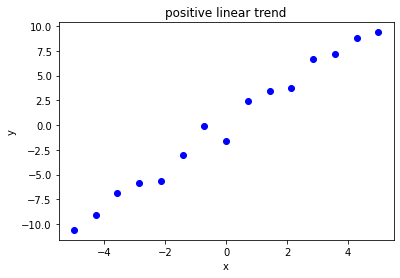

In [ ]:
# linear positive trend
noise = np.random.normal(0,1,15)
y_ptrend = 2*x_axis + noise ## scalar multiplication and addition
print ('y_ptrend:',y_ptrend)

# plot the values on x axis and y axis
import matplotlib.pyplot as plt

plt.scatter(x_axis, y_ptrend,color = 'blue')
plt.title("positive linear trend")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Linear negative trend:
$y = -kx+noise$, where $k$ is some positive scalar

y_ntrend: [ 11.92254002   7.77417499   7.58934286   6.72064296   5.02710284
   3.76831196  -0.28231237  -1.06544591   1.01827309  -2.28548384
  -5.75640042  -7.57165915  -8.97402584 -10.13772482 -11.23355925]


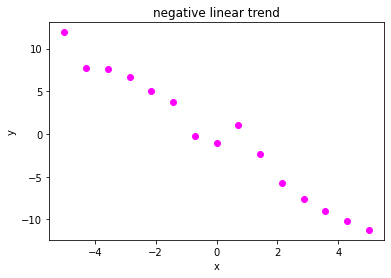

In [ ]:
# negative linear trend
np.linspace(-5,5,15)
noise = np.random.normal(0,1,15)
y_ntrend = (-2)*x_axis +noise # scalar multiplication and addition
print ('y_ntrend:',y_ntrend)

# plot the values on x axis and y axis
import matplotlib.pyplot as plt

plt.scatter(x_axis, y_ntrend,color = 'magenta')
plt.title("negative linear trend")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

positive nonlinear trend:
$y = tanh(x)+noise$.  


y axis: [-1.02228276 -0.92884909 -1.00287973 -1.09906409 -1.01427291 -0.92647136
 -0.66863639 -0.0364088   0.5900509   0.97351402  0.97549467  0.87014182
  0.9196839   1.01915822  1.05477131]


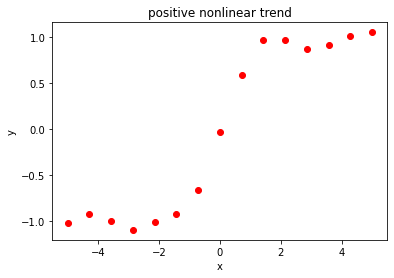

In [ ]:
# positive nonlinear trend: y = tanh(x)
noise = np.random.normal(0,0.05,15)
y_axis = np.tanh(x_axis) + noise
print ('y axis:',y_axis)

## plot the values on x axis and y axis
import matplotlib.pyplot as plt

plt.scatter(x_axis, y_axis,color = 'red')
plt.title("positive nonlinear trend")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


As $x$ increases, $y$ also increases nonlinearly. Plotting more values will make the graph smoother. We can see from the above figure that as x increases, y goes to +1 and as x decreases, y goes to $-1$.


y axis: [146.48117534  71.7442984   35.72306817  17.24278435   8.48117497
   5.01766106   0.87409109   2.40374772  -0.85356948  -1.25766079
  -0.21610085   1.77986071   0.66765225  -0.3019362    0.15207541]


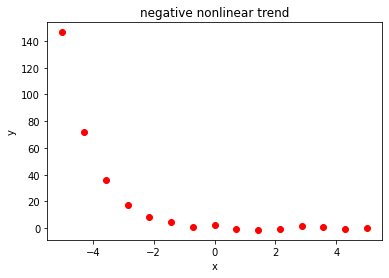

In [ ]:
# negative nonlinear trend: y = exp(-x)
noise = np.random.normal(0,1,15)
y_axis = np.exp(-x_axis) + noise
print ('y axis:',y_axis)

## plot the values on x axis and y axis
import matplotlib.pyplot as plt

plt.scatter(x_axis, y_axis,color = 'red')
plt.title("negative nonlinear trend")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Visualizing a 2-dimensional binary classification data

Generate a 2-dimensional binary dataset using function "make_classification" from sklearn library and scatter the generated samples on 2d graph.

n_samples = number of samples,

n_features = number of features,

n_repeated = number of repeated features,

n_redundant = number of redundant features,

class_sep = measures the separation between samples of different classes. Larger the value of class_sep, more will be the separtion between samples of different classes.

random_state = seed to generate random samples

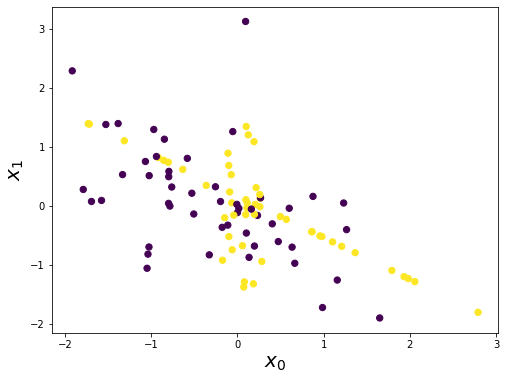

In [ ]:
from sklearn import datasets
x, y = datasets.make_classification(n_samples=100,n_features=2,n_repeated=0,class_sep=0.1,n_redundant=0,random_state=100)

# Create the plot

fig, ax = plt.subplots(figsize=(8, 6))
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$", fontsize=20)
plt.scatter(x[:,0], x[:,1], s=40, c=y)
# print (x)

# **Solving a system of linear equations**
Let $A$ be a $n\times n$ matrix with real entries and $b\in\mathbb{R}^n$ then we can solve the linear system of equation $Ax=b,\,\,x\in\mathbb{R}^n$. A system of linear equations can give rise to the following cases:
- Unique solution
- Multiple solution
- No solution.

## **Unique Solution**
Consider $A=5I_4-\begin{bmatrix}
1 &1 &1 &1\\
1 &1 &1 &1\\
1 &1 &1 &1\\
1 &1 &1 &1
\end{bmatrix}=\begin{bmatrix}
4 &-1 &-1 &-1\\
-1 &4 &-1 &-1\\
-1 &-1 &4 &-1\\
-1 &-1 &-1 &4
\end{bmatrix}$ and $b=\begin{bmatrix}
1\\
2\\
3\\
4
\end{bmatrix}$.

We want to find $x$ which satisfies $Ax=b$.

In [ ]:
#We entering the values of A and b
A = np.array([[4, -1, -1, -1], [-1, 4, -1, -1], [-1, -1, 4, -1], [-1, -1, -1, 4]])
b = np.array([1, 2, 3, 4])
#In order to solve a linear system of equations Ax=b, the following command can be used
x = np.linalg.solve(A, b) 
print('x =',x)

x = [2.2 2.4 2.6 2.8]


Solving $Ax=b$ for a square matrix $A$ can be equivalently written as
\begin{align*}
&Ax=b\\
\implies &x=A^{-1}b
\end{align*}
**provided $A^{-1}$ exists.**

In [ ]:
A_inv = np.linalg.inv(A)
y = np.matmul(A_inv, b)
print(y)

[2.2 2.4 2.6 2.8]


## **Multiple Solutions**
Consider the following system of equations
\begin{align*}
2x+3y+z&=9\\
x+y+z&=11\\
4x+6y+2z&=18.
\end{align*}
In this case $A=\begin{bmatrix}
2 &3 &1\\
1 &1 &1\\
4 &6 &2 
\end{bmatrix}$ and $b=\begin{bmatrix}
9\\
11\\
18
\end{bmatrix}$.

In [ ]:
#We entering the values of A and b
A = np.array([[2, 3, 1], [1, 1, 1], [4, 6, 2]])
b = np.array([9, 11, 18])
#In order to solve a linear system of equations Ax=b, the following command can be used
x = np.linalg.solve(A, b)

LinAlgError: ignored

In [ ]:
A_inv = np.linalg.inv(A)

LinAlgError: ignored

In [ ]:
import sympy
Ab = np.column_stack((A,b)) ## Ab is called augmented matrix
print('[A|b] =',Ab)
print('Row reduced echelon form of [A|b] is')
sympy.Matrix(Ab).rref()[0]

[A|b] = [[ 2  3  1  9]
 [ 1  1  1 11]
 [ 4  6  2 18]]
Row reduced echelon form of [A|b] is


Matrix([
[1, 0,  2,  24],
[0, 1, -1, -13],
[0, 0,  0,   0]])

The system of linear equations:
\begin{align*}
2x+3y+z&=9\\
x+y+z&=11\\
4x+6y+2z&=18
\end{align*}
can be reduced to the following using linear combinations of the equations:
\begin{align*}
&x+&2z&=24\\
&&y-z&=-13.
\end{align*}
This can be derived from the row-reduced echelon form of the augmented matrix.

## **No Solution**
Consider the following system of equations
\begin{align*}
2x+3y+z&=9\\
x+y+z&=11\\
4x+6y+2z&=15.
\end{align*}
In this case $A=\begin{bmatrix}
2 &3 &1\\
1 &1 &1\\
4 &6 &2 
\end{bmatrix}$ and $b=\begin{bmatrix}
9\\
11\\
15
\end{bmatrix}$.

In [ ]:
#We entering the values of A and b
A = np.array([[2, 3, 1], [1, 1, 1], [4, 6, 2]])
b = np.array([9, 11, 15])
#In order to solve a linear system of equations Ax=b, the following command can be used
x = np.linalg.solve(A, b)

LinAlgError: ignored

In [ ]:
A_inv = np.linalg.inv(A)

LinAlgError: ignored

In [ ]:
Ab = np.column_stack((A,b))
print(Ab)
print('Row reduced echelon form of [A|b] is')
sympy.Matrix(Ab).rref()[0]

[[ 2  3  1  9]
 [ 1  1  1 11]
 [ 4  6  2 15]]
Row reduced echelon form of [A|b] is


Matrix([
[1, 0,  2, 0],
[0, 1, -1, 0],
[0, 0,  0, 1]])

The system of linear equations:
\begin{align*}
2x+3y+z&=9\\
x+y+z&=11\\
4x+6y+2z&=15
\end{align*}
can be reduced to the following using linear combinations of the equations:
\begin{align*}
x+&&2z&=0\\
&y-&z&=0\\
0x+&0y+&0z&=1.
\end{align*}
This can be derived from the row-reduced echelon form of the augmented matrix and illustrates that the sytem is inconsistent.